Machine Learning - Project 2 - Question No 4
SVM from scratch 

@ Raha Amirian

Programming language: Python 

Dataset: Breast cancer Wisconsin


In [ ]:
# in order to share the actual ”wall-clock” 
import time
start_time = time.time()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

# Extract features and target
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Convert target values to binary
y = np.where(y == 'M', -1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the SVM 
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient descent
        for i in range(self.n_iters):
            for j, x_i in enumerate(X):
                condition = y[j] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[j]))
                    self.b -= self.lr * y[j]
    
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

svm = SVM()


# Train the model
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)


# Evaluate the model performance
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")


end_time = time.time()
print("Wall Clock Time: {:.2f} seconds".format(end_time - start_time))

Accuracy: 0.8947368421052632
Wall Clock Time: 5.76 seconds


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8947368421052632
Precision: 0.9508196721311475
Recall: 0.8656716417910447
F1 Score: 0.9062499999999999
Confusion Matrix:
 [[44  3]
 [ 9 58]]


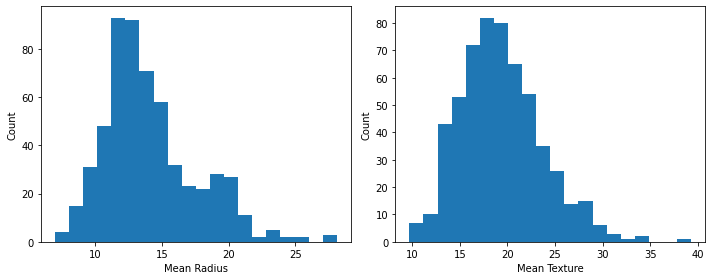

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of mean radius and mean texture
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=20)
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins=20)
plt.xlabel("Mean Texture")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Print the results in a table
print("Confusion Matrix:")
print("===================")
print(f"True Negatives:  {tn:4d}    False Positives: {fp:4d}")
print(f"False Negatives: {fn:4d}    True Positives:  {tp:4d}")


Confusion Matrix:
True Negatives:    44    False Positives:    3
False Negatives:    9    True Positives:    58
